In [2]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = "/Users/daniel.martinezcarre/Desktop/Clase/IA/Programacion de IA/datos/"

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = data_dir + "imdb_top_1000.csv"
df = pd.read_csv(filename, usecols=["Certificate", "Genre", "IMDB_Rating"])
df = df.dropna()
df.head()

,Certificate,Genre,IMDB_Rating
0,A,Drama,9.3
1,A,"Crime, Drama",9.2
2,UA,"Action, Crime, Drama",9.0
3,A,"Crime, Drama",9.0
4,U,"Crime, Drama",9.0


In [4]:
df.describe()

,IMDB_Rating
count,899.000000
mean,7.951279
std,0.281987
min,7.600000
25%,7.700000
50%,7.900000
75%,8.100000
max,9.300000


> Quedarme con un género sólo

In [6]:
df['Género'] = df['Genre'].str.split(",", expand=True)[0]   # El expand convierte las series en dataframes
df

,Certificate,Genre,IMDB_Rating,Género
0,A,Drama,9.3,Drama
1,A,"Crime, Drama",9.2,Crime
2,UA,"Action, Crime, Drama",9.0,Action
3,A,"Crime, Drama",9.0,Crime
4,U,"Crime, Drama",9.0,Crime
...,...,...,...,...
993,A,"Drama, Mystery, Thriller",7.6,Drama
994,U,"Comedy, Music, Musical",7.6,Comedy
995,A,"Comedy, Drama, Romance",7.6,Comedy
996,G,"Drama, Western",7.6,Drama


In [20]:
df_r = df.groupby(["Certificate", "Género"])["IMDB_Rating"].mean()
df_r

Certificate  Género   
16           Animation    8.100000
A            Action       7.873171
             Adventure    7.912500
             Animation    7.866667
             Biography    8.017647
                            ...   
UA           Crime        7.900000
             Drama        7.953659
             Horror       7.600000
             Mystery      8.250000
Unrated      Comedy       8.100000
Name: IMDB_Rating, Length: 79, dtype: float64

In [21]:
df_r = df_r.unstack()   # Los géneros se convierten en columnas
# Hacemos esto para conseguir una tabla para posteriormente realizar un mapa de calor
df_r

Género,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Film-Noir,Horror,Mystery,Western
Certificate,,,,,,,,,,,,
16,NaN,NaN,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,7.873171,7.912500,7.866667,8.017647,7.877778,8.130233,8.036364,NaN,NaN,8.02,7.94,8.3
Approved,7.700000,NaN,NaN,NaN,8.000000,8.000000,7.933333,NaN,8.1,NaN,NaN,NaN
G,7.800000,NaN,7.850000,8.100000,8.140000,NaN,7.800000,NaN,NaN,NaN,NaN,NaN
GP,NaN,7.600000,NaN,NaN,NaN,8.100000,NaN,NaN,NaN,NaN,NaN,NaN
PG,7.833333,7.928571,7.928571,7.975000,7.816667,NaN,8.025000,NaN,7.8,NaN,8.00,NaN
PG-13,7.783333,7.600000,7.866667,7.862500,7.785714,8.000000,7.775000,NaN,NaN,7.60,NaN,NaN
Passed,8.025000,8.000000,NaN,8.100000,8.010000,8.166667,7.980000,NaN,NaN,NaN,NaN,NaN
R,7.812500,7.900000,7.800000,7.900000,7.824138,7.814286,7.915094,NaN,NaN,8.05,NaN,NaN


In [22]:
df_r.index

Index(['16', 'A', 'Approved', 'G', 'GP', 'PG', 'PG-13', 'Passed', 'R', 'TV-14',
       'TV-MA', 'TV-PG', 'U', 'U/A', 'UA', 'Unrated'],
      dtype='object', name='Certificate')

> Por selección de valores

In [23]:
calificaciones = ["U", "UA", "PG-13", "R", "A"]
generos = [ "Animation" , "Action" , "Adventure" , "Biography" , "Comedy" , "Crime" , "Drama" ]
df_r = df_r.loc[calificaciones,generos]
df_r

Género,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
Certificate,,,,,,,
U,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
UA,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
PG-13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
R,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
A,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


In [26]:
# Quitamos el índice antes de cambiar los valores
df3 = df_r.reset_index()

calificaciones_legibles = {"U" : "ALL" , "UA" : ">12" , "PG-13" : ">13" , "R" : ">17" , "A" : ">18" }
df3["Certificate"] = df3["Certificate"].replace(calificaciones_legibles)
df3

Género,Certificate,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
0,ALL,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
1,>12,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
2,>13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
3,>17,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
4,>18,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


### Mapa de calor

[Text(0, 0, 'U'),
 Text(0, 1, 'UA'),
 Text(0, 2, 'PG-13'),
 Text(0, 3, 'R'),
 Text(0, 4, 'A')]

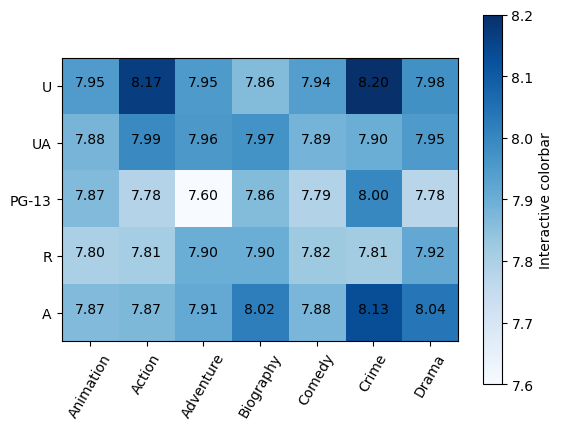

In [38]:
fig, ax = plt.subplots()

im = ax.imshow(df_r, cmap="Blues")

fig.colorbar(im, ax=ax, label='Interactive colorbar')

x = df_r.columns
y = df_r.index

for i in range(len(y)):
    for j in range(len(x)):
        valor = df_r.iloc[i,j]
        ax.text(j, i, f"{valor:.2f}", ha='center')

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=60)

ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
